**Warning**: seperti biasa temen-temen, save di drive masing-masing dulu yaa

Download dataset di sini:
[Dataset Ekspor](https://drive.google.com/file/d/1uuq7QrgHyozgy31G3AoINHNtTLL7BMv2/view?usp=sharing) bagi yang belum mendownload dataset











In [1]:
# Basic library yang digunakan
import itertools
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import os

Berikut ini untuk proses pembuatan ts data. Kalau di R ya fungsi ts(). Diskip juga boleh sebenarnya, kalau tidak mau membentuk data time series bisa langsung run cell code ke-3 untuk mengimport data

In [6]:
# Proses membangkitkan data waktu (Boleh diskip)
dates = pd.date_range('20000101',periods=249,freq='MS')
dates

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', length=249, freq='MS')

In [4]:
#Jika menggunakan format Excel Workbook, sesuaikan nama file, langsung run
df=pd.read_excel('Data Eskpor.xlsx')

# Jika menggunakan format csv, hilangkan tanda # di bawah ini, dan beri tanda # di depan sintaks untuk excel workbook 
#df=pd.read_csv('Data Ekspor.csv', delimiter=',')

# Memanggil data terbawah (default=5)
df.tail(3)

,Ekspor
246,152.3
247,153.8
248,151.3


In [7]:
#Menyatukan data waktu ke dataframe yang ada, dengan menambah kolom 'date' (Boleh diskip)

df['date']=pd.DataFrame(dates)
df.head()

,Ekspor,date
0,39.6,2000-01-01
1,41.2,2000-02-01
2,42.4,2000-03-01
3,42.4,2000-04-01
4,46.0,2000-05-01


In [8]:
# Setting indeks menjadi indeks runtun waktu (Boleh diskip)

ts_df=df.set_index('date')
ts_df.head()

,Ekspor
date,
2000-01-01,39.6
2000-02-01,41.2
2000-03-01,42.4
2000-04-01,42.4
2000-05-01,46.0


**Plot Time Series**

Text(0, 0.5, 'Ekspor')

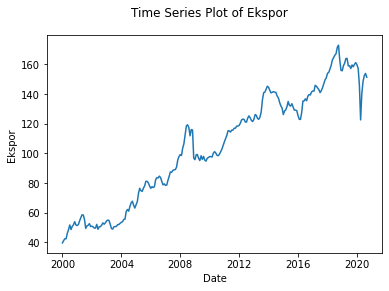

In [9]:
#Plot Time Series ini jika tidak dilakukan prosen pengindeksan runtun waktu, maka variabel Y hanya berupa urutan observasi

fig=plt.figure()
plt.plot(ts_df['Ekspor'])
fig.suptitle('Time Series Plot of Ekspor')
plt.xlabel('Date')
plt.ylabel('Ekspor')

# Membuat input dan target

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


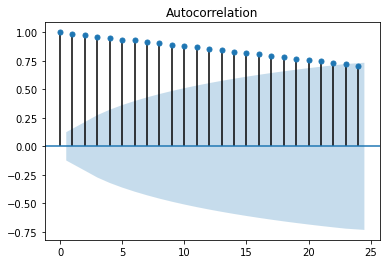

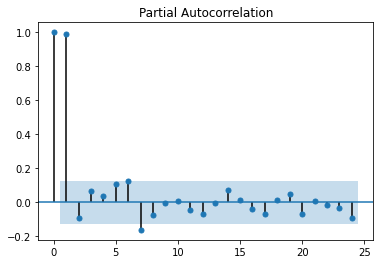

In [10]:
# Plot ACF dan PACF
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df[['Ekspor']])
sm.graphics.tsa.plot_pacf(df[['Ekspor']])
plt.show()

Apabila lag yang keluar dari batas signifikan di awal berjumlah 3, maka look back yang digunakan sebesar 3.
Nantinya variabel input kan berjumlah 3, dan banyak observasi juga berkurang 3. Berikut ilustrasi perubahan data pada look back = 3

Data awal

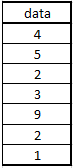

Data setelah didapatkan input dan target:

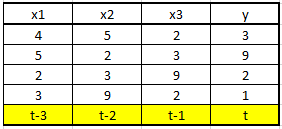

di mana Xi untuk i=1 s/d n, berisi data ke-(t-(n-i+1)). Y berisi data ke-t

In [ ]:
# WARNING: disarankan penggunaan scaling hanya pada fungsi aktivasi tertentu yang range datanya tidak sesuai data asli seperti sigmoid
# Scalling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scale = min_max_scaler.fit_transform(df['Ekspor'].values.reshape(-1, 1))

In [11]:
# RUNNING INI JIKA TIDAK MENGGUNAKAN SCALING
data = df['Ekspor'].values.reshape(-1, 1)

In [13]:
#Split data menjadi training dan testing
# Contoh membagi data training hingga Desember 2018, dan testing dari Januari 2019 hingga September 2020
test_size = 21
train_size = len(data) - test_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

228 21


In [14]:
# Fungsi untuk membangun variabel input dan target
def input_target(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# Membangun data input dan target pada data yang kita miliki
x_train, y_train = input_target(train, 1)
x_test, y_test = input_target(test, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(227, 1)
(227,)
(20, 1)
(20,)


# Multilayer Perceptron (MLP)

In [16]:
#Import library yang dibutuhkan
import tensorflow as tf
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [17]:
#Mendefinisikan layer input sebagai (look_back, none)
input_layer = Input(shape=(1,))

In [22]:
#Dense layer di sini seperti hidden layer, contoh digunakan 1 hidden dengan 100 neuron
dense1 = Dense(100, activation='relu')(input_layer)

In [23]:
#Mendefinisikan output layer
output_layer = Dense(1, activation='linear')(dense1)

In [24]:
#Membentuk model
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Running model pada data training
save_path = "."
save_weights_at=os.path.join('keras_model','Bobot_ekspor.hdf5')
save_best=ModelCheckpoint(save_weights_at, monitor='val_loss',verbose=0,
                          save_best_only=True,save_weights_only=False)
ts_model.fit(x_train, y_train, batch_size=16, epochs=100,
             verbose=1, callbacks=[save_best], validation_data=(x_train, y_train),
             shuffle=True)
ts_model.save(os.path.join(save_path,"network.h5"))

Epoch 1/100
15/15 [==============================] - 0s 11ms/step - loss: 9631.9405 - val_loss: 6659.0093
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 5693.8817 - val_loss: 3806.0366
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 3367.5615 - val_loss: 1910.2069
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1672.2423 - val_loss: 817.9739
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 637.6173 - val_loss: 272.9140
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 206.3202 - val_loss: 66.2456
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 51.4342 - val_loss: 13.8333
Epoch 8/100
15/15 [==============================] - 0s 13ms/step - loss: 9.4725 - val_loss: 7.1598
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 9.5190 - val_loss: 7.1741
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 6

In [26]:
#Prediksi data training dan testing berdasarkan bobot terbaik yang didapat
best_model = load_model(os.path.join(save_path,"network.h5"))
trainPredict = best_model.predict(x_train)
testPredict = best_model.predict(x_test)

#Re-shape data Y train dan testing agar dapat dikonversi menjadi data asli kembali
y_tr=y_train.reshape(-1,1)
y_ts=y_test.reshape(-1,1)

#Konfersi data train dan test
# HILANGKAN TANDA PAGAR DI BAWAH JIKA MENGGUNAKAN SCALING

#trainPredict=min_max_scaler.inverse_transform(trainPredict)
#y_train=min_max_scaler.inverse_transform(y_tr)
#testPredict=min_max_scaler.inverse_transform(testPredict)
#y_test=min_max_scaler.inverse_transform(y_ts)

In [27]:
#Melihat R-square dari data training dan testing
#R-Square, RMSE, MSE, MAPE, dsb sering digunakan untuk kasus regresi, karena tidak dapat menggunakan akurasi, presisi, recall, dsb.
from sklearn.metrics import r2_score

r2tr = r2_score(y_train, trainPredict)
print('R-squared data training:', round(r2tr,4)*100,"%")
r2ts = r2_score(y_test, testPredict)
print('R-squared data testing:', round(r2ts,4)*100,"%")

R-squared data training: 99.42999999999999 %
R-squared data testing: 34.38 %


In [28]:
# Menghitung RMSE
from sklearn import metrics

score = np.sqrt(metrics.mean_squared_error(trainPredict,y_train))
print(f"RMSE data training: {score}")
score = np.sqrt(metrics.mean_squared_error(testPredict,y_test))
print(f"RMSE data testing: {score}")

RMSE data training: 2.663713050295902
RMSE data testing: 7.623844570598912


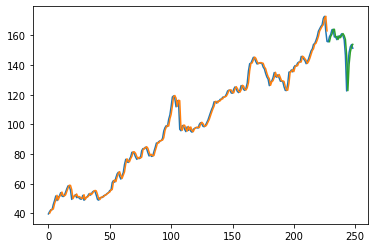

In [29]:
#Memvisualisasi hasil prediksi vs. aktual

look_back=1
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data), :] = testPredict
# plot baseline and predictions
plt.plot(df[['Ekspor']])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
